In [9]:
!pip install fredapi > null


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 500)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

from fredapi import Fred


In [4]:
fred_key = '42123b6d2f54c162c85ddecc8f077c78'

# 1. Create the fred object

In [8]:
fred = Fred(api_key = fred_key)

# 2. Search Fred for economic data

In [10]:
fred.search('S&P', limit = 1005)

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
CSUSHPINSA,CSUSHPINSA,2025-02-21,2025-02-21,S&P CoreLogic Case-Shiller U.S. National Home ...,1987-01-01,2024-11-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2025-01-28 08:12:01-06:00,88,"For more information regarding the index, plea..."
CSUSHPISA,CSUSHPISA,2025-02-21,2025-02-21,S&P CoreLogic Case-Shiller U.S. National Home ...,1987-01-01,2024-11-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Seasonally Adjusted,SA,2025-01-28 08:12:01-06:00,78,"For more information regarding the index, plea..."
SP500,SP500,2025-02-21,2025-02-21,S&P 500,2015-02-23,2025-02-20,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2025-02-20 19:11:30-06:00,83,The observations for the S&P 500 represent the...
SPCS20RSA,SPCS20RSA,2025-02-21,2025-02-21,S&P CoreLogic Case-Shiller 20-City Composite H...,2000-01-01,2024-11-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Seasonally Adjusted,SA,2025-01-28 08:11:01-06:00,67,"For more information regarding the index, plea..."
SPCS20RNSA,SPCS20RNSA,2025-02-21,2025-02-21,S&P CoreLogic Case-Shiller 20-City Composite H...,2000-01-01,2024-11-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2025-01-28 08:11:38-06:00,33,"For more information regarding the index, plea..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
M1425BUSM027NNBR,M1425BUSM027NNBR,2025-02-21,2025-02-21,Currency Held by the Public for United States,1947-01-01,1968-05-01,Monthly,M,Billions of Dollars,Bil. of $,Not Seasonally Adjusted,NSA,2012-08-20 08:31:49-05:00,1,"Source: Federal Reserve Board, Data For 1947-1..."
Q07026DEQ421NNBR,Q07026DEQ421NNBR,2025-02-21,2025-02-21,Value of Exports for Germany,1892-01-01,1914-04-01,Quarterly,Q,Millions of Marks,Mil. Of Marks,Not Seasonally Adjusted,NSA,2012-08-17 14:02:56-05:00,1,This Series Excludes Precious Metal Beginning ...
QCOPAM770A,QCOPAM770A,2025-02-21,2025-02-21,"Total Credit to Private Non-Financial Sector, ...",1996-10-01,2024-04-01,"Quarterly, End of Quarter",Q,Percentage of GDP,Percentage of GDP,Not Seasonally Adjusted,NSA,2024-12-14 15:35:57-06:00,0,"Credit is provided by domestic banks, all othe..."


In [14]:
sp_search = fred.search('S&P', order_by='popularity')

In [18]:
sp_search.shape

(1000, 15)

In [20]:
sp_search 

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2025-02-21,2025-02-21,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2025-02-19,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2025-02-20 08:51:08-06:00,92,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2025-02-21,2025-02-21,S&P CoreLogic Case-Shiller U.S. National Home ...,1987-01-01,2024-11-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2025-01-28 08:12:01-06:00,88,"For more information regarding the index, plea..."
SP500,SP500,2025-02-21,2025-02-21,S&P 500,2015-02-23,2025-02-20,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2025-02-20 19:11:30-06:00,83,The observations for the S&P 500 represent the...
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2025-02-21,2025-02-21,ICE BofA US High Yield Index Effective Yield,1996-12-31,2025-02-19,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2025-02-20 08:51:11-06:00,82,This data represents the effective yield of th...
BAMLC0A0CM,BAMLC0A0CM,2025-02-21,2025-02-21,ICE BofA US Corporate Index Option-Adjusted Sp...,1996-12-31,2025-02-19,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2025-02-20 08:59:02-06:00,78,The ICE BofA Option-Adjusted Spreads (OASs) ar...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DDDI12SMA156NWDB,DDDI12SMA156NWDB,2025-02-21,2025-02-21,Private Credit by Deposit Money Banks and Othe...,2001-01-01,2020-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2024-05-07 15:28:48-05:00,3,Private credit by deposit money banks and othe...
Q03069USQ605NNBR,Q03069USQ605NNBR,2025-02-21,2025-02-21,"Revenue Freight Tons Originated, Less Than Car...",1920-01-01,1943-07-01,Quarterly,Q,Thousands of Tons,Thous. Of Tons,Not Seasonally Adjusted,NSA,2012-08-16 14:05:10-05:00,3,"Source: Interstate Commerce Commission, Data F..."
CSHICPCZA156NRUG,CSHICPCZA156NRUG,2025-02-21,2025-02-21,Share of Gross Capital Formation at Current Pu...,1990-01-01,2019-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2021-11-08 13:36:33-06:00,3,Source ID: csh_i When using these data in you...


# 3. Pull raw data and plot

In [23]:
sp500 = fred.get_series(series_id='SP500')

<Axes: >

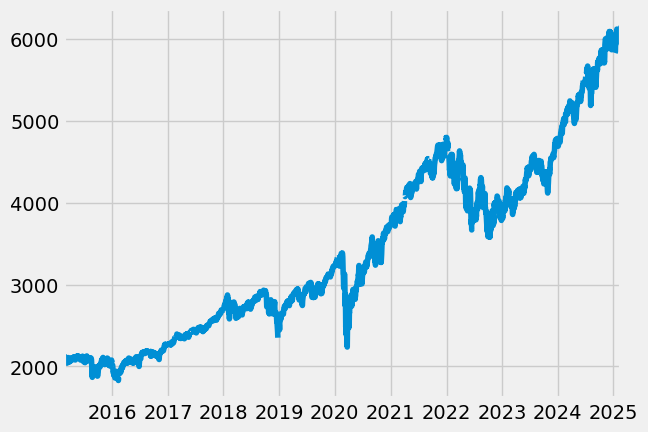

In [27]:
sp500.plot()

In [33]:
sp500.head()
# The first column is the date and the second column is the price of the S&P

2015-02-23    2109.66
2015-02-24    2115.48
2015-02-25    2113.86
2015-02-26    2110.74
2015-02-27    2104.50
dtype: float64

<Axes: title={'center': 'S&P 500'}>

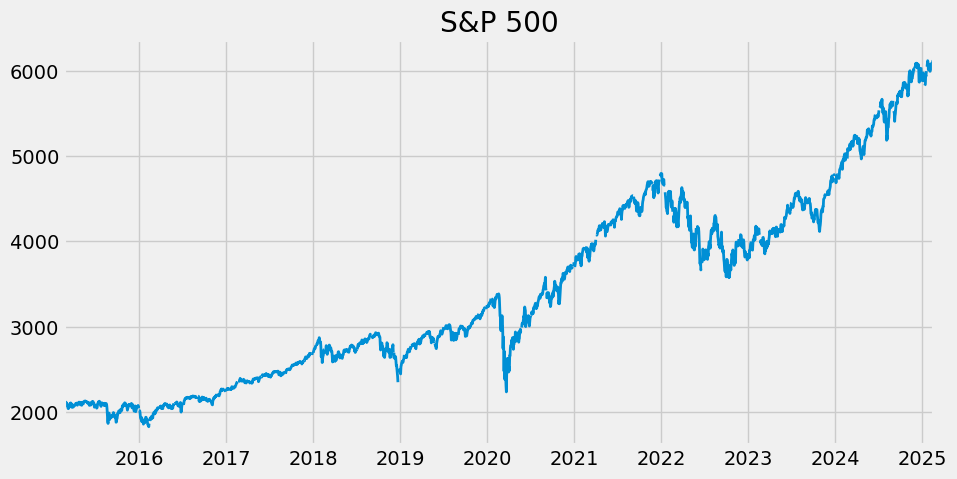

In [35]:
sp500.plot(figsize=(10,5),title = 'S&P 500', lw = 2)
# lw is the line width

In [37]:
type(sp500)

pandas.core.series.Series

# 4. Pull and Join Multiple Data Series

In [44]:
unemp_results = fred.search('unemployment')


In [46]:
unemp_results 

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2025-02-21,2025-02-21,Unemployment Rate,1948-01-01,2025-01-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-02-07 07:47:42-06:00,95,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2025-02-21,2025-02-21,Unemployment Rate,1948-01-01,2025-01-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2025-02-07 07:47:42-06:00,58,The unemployment rate represents the number of...
UNEMPLOY,UNEMPLOY,2025-02-21,2025-02-21,Unemployment Level,1948-01-01,2025-01-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2025-02-07 07:47:42-06:00,71,The series comes from the 'Current Population ...
NROU,NROU,2025-02-21,2025-02-21,Noncyclical Rate of Unemployment,1949-01-01,2034-10-01,Quarterly,Q,Percent,%,Not Seasonally Adjusted,NSA,2024-07-01 12:01:04-05:00,69,"Starting with the July, 2021 report: An Update..."
CCSA,CCSA,2025-02-21,2025-02-21,Continued Claims (Insured Unemployment),1967-01-07,2025-02-08,"Weekly, Ending Saturday",W,Number,Number,Seasonally Adjusted,SA,2025-02-20 07:37:35-06:00,74,"Continued claims, also referred to as insured ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LAUCN340030000000003A,LAUCN340030000000003A,2025-02-21,2025-02-21,"Unemployment Rate in Bergen County, NJ",1990-01-01,2023-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2024-05-01 10:48:38-05:00,0,These data come from the Current Population Su...
LMUNRRTTLUM156S,LMUNRRTTLUM156S,2025-02-21,2025-02-21,Infra-Annual Registered Unemployment and Job V...,1995-01-01,2023-12-01,Monthly,M,Growth rate previous period,Growth rate previous period,Seasonally Adjusted,SA,2024-04-10 11:07:38-05:00,5,OECD Data Filters: REF_AREA: LUX MEASURE: REG...
LNS14000315,LNS14000315,2025-02-21,2025-02-21,Unemployment Rate - Married Women,1955-01-01,2025-01-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-02-07 07:48:35-06:00,9,To obtain estimates of women worker employment...


In [48]:
unrate = fred.get_series('UNRATE')

In [50]:
unrate

1948-01-01    3.4
1948-02-01    3.8
1948-03-01    4.0
1948-04-01    3.9
1948-05-01    3.5
             ... 
2024-09-01    4.1
2024-10-01    4.1
2024-11-01    4.2
2024-12-01    4.1
2025-01-01    4.0
Length: 925, dtype: float64

<Axes: >

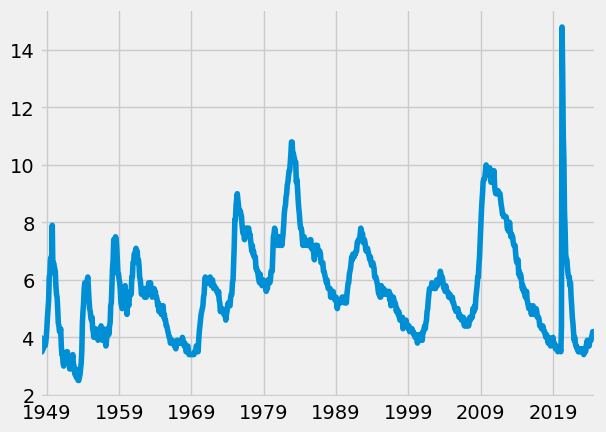

In [52]:
unrate.plot()